# Preprocessing our data and feature selection
1. The first part of building a good machine learning model is being able to load the data so we can work with it. 
2. A second part/aspect of building a good machine learning model is finding the features that are meaningful for the model (those features that will really impact the model). 
3. There are two main techniques for feature selection: 
* PCA (Principal Component Analysis) - Performs dimensionality reduction using Single Value Decomposition.
* Feature Selection using Random Forest (embedded methods)

## Making sure that we can read the data from the json files
1. Let's start by loading our data and doing a quick visualization.

In [1]:
import pandas as pd

# Loading the training data from the .json file as a DataFrame
train_df = pd.read_json("train_products.json")

# Loading the test data from the .json file as a Df
test_df = pd.read_json("test_products.json")



In [2]:
# Reading the first 10 rows of the df
train_df.head(20)


,0,1,2,3,4,5,6,7,8,9,...,20825,20826,20827,20828,20829,20830,20831,20832,20833,20834
name,Pommes duchesse,Bûche pâtissière à la crème au beurre,Cini Minis,Cuor di fette Carrefour,Curry,Extra Fin Noir Croustillant,Mayonnaise,Dés de saumon fumé,Pomme Mangue Sans sucres ajoutés*,Filets de Hareng Ronde des Mers Doux sachet,...,Tarte fine aux pommes,Délisse - Lait demi-écrémé,Queso curado,Speculoos,Beurre aux herbes,jus de pommes,Cafe soluble tueste natural,Cioccolato fondente con nocciole intere,BEURRE MOULÉ DE Bretagne Demi sel,Pechuga de pavo
brand,"Pom lisse,Pom'Lisse, Marque Repère","Esprit de Fête,Carrefour","Nestlé, Nestlé",Carrefour,"Carrefour,Groupe Carrefour","Côte d'Or,Mondelez","Winiary,Nestlé",Carrefour,"Carrefour Bio,Carrefour","Ronde des Mers,Marque Repère, Pêche Océan",...,Carrefour,"Délisse,Marque Repère",Eroski,Carrefour,Nestlé,Carrefour,Eroski,Carrefour,Carrefour,eroski
generic_name,unknown,unknown,,unknown,unknown,unknown,,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
categories_hierarchy,"[en:frozen-foods, en:frozen-fried-potatoes, en...","[en:snacks, en:desserts, en:sweet-snacks, en:f...","[en:plant-based-foods-and-beverages, en:plant-...","[en:dairies, en:fermented-foods, en:fermented-...","[en:plant-based-foods-and-beverages, en:plant-...","[en:snacks, en:sweet-snacks, en:cocoa-and-its-...","[en:condiments, en:sauces, en:mayonnaises, en:...","[en:seafood, en:fishes, en:fatty-fishes, en:sa...","[en:plant-based-foods-and-beverages, en:plant-...","[en:seafood, en:fishes, en:fatty-fishes, en:fi...",...,"[en:sweet-pies, en:fruit-tarts, en:pies, en:ap...","[en:dairies, en:milks, en:homogenized-milks, e...","[en:dairies, en:fermented-foods, en:fermented-...","[en:snacks, en:sweet-snacks, en:biscuits-and-c...","[en:dairies, en:fats, en:spreads, en:spreadabl...","[en:plant-based-foods-and-beverages, en:bevera...","[en:plant-based-foods-and-beverages, en:bevera...","[en:snacks, en:sweet-snacks, en:cocoa-and-its-...","[en:dairies, en:fats, en:spreads, en:spreadabl...","[en:meats-and-their-products, en:meats, en:pou..."
is_beverage,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
selling_countries,[en:france],[en:france],"[en:austria, en:france, en:germany, en:spain, ...",[en:italy],[en:france],[en:france],"[en:france, en:poland, en:united-states]",[en:france],"[en:france, en:italy, en:spain]",[en:france],...,[en:france],[en:france],[en:spain],"[en:france, en:guadeloupe, en:italy, en:spain]",[en:switzerland],[en:france],[en:spain],[en:italy],[en:france],[en:spain]
ingredient_origins,{'en:unknown': 100},{'en:unknown': 100},{'en:unknown': 100},{'en:unknown': 100},{'en:unknown': 100},{'en:unknown': 100},{'en:unknown': 100},"{'en:ireland': 50, 'en:norway': 50}",{'en:european-union': 100},"{'en:faroe-islands': 50, 'en:iceland': 50}",...,{'en:unknown': 100},{'en:france': 100},{'en:unknown': 100},{'en:belgium': 100},{'en:unknown': 100},{'en:france': 100},{'en:unknown': 100},{'en:unknown': 100},{'en:unknown': 100},{'en:unknown': 100}
ingredients,"[{'id': 'en:potato', 'percent': 82, 'percent_e...","[{'id': 'en:glucose-syrup', 'percent_estimate'...","[{'id': 'en:whole-wheat-flour', 'percent': 37,...","[{'has_sub_ingredients': 'yes', 'id': 'en:chee...","[{'id': 'en:turmeric', 'percent_estimate': 55....","[{'id': 'en:sugar', 'percent_estimate': 50, 'r...","[{'from_palm_oil': 'no', 'id': 'en:rapeseed-oi...","[{'has_sub_ingredients': 'yes', 'id': 'en:atla...","[{'id': 'en:apple-puree', 'labels': 'en:organi...","[{'has_sub_ingredients': 'yes', 'id': 'en:herr...",...,"[{'id': 'en:golden-delicious-apple', 'percent'...","[{'id': 'fr:lait-demi-ecreme-uht', 'percent_es...",unknown,"[{'id': 'en:wheat-flour', 'percent': 50.8, 'pe...","[{'id': 'en:butter', 'percent': 76, 'percent_e...","[{'id': 'en:apple-juice', 'labels': 'en:organi...",unknown,unknown,"[{'has_sub_ingredients': 'yes', 'id': 'en:crea...",unknown
additives_count,1,10,3,2,0,2,2,0,2,0,...,2,0,unknown,1,2,0,unknown,unknown,0

**Note**: It appears that the json data was loaded in such a way that the columns and the rows are inverted. We need to transpose the data. 

In [3]:
# Transposing the column and the rows
train_df = train_df.transpose()
test_df = test_df.transpose()


In [4]:
train_df

,name,brand,generic_name,categories_hierarchy,is_beverage,selling_countries,ingredient_origins,ingredients,additives_count,calcium_100g,...,nutrition_grade,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,Pommes duchesse,"Pom lisse,Pom'Lisse, Marque Repère",unknown,"[en:frozen-foods, en:frozen-fried-potatoes, en...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:potato', 'percent': 82, 'percent_e...",1,unknown,...,b,[en:plastic],1,1.405794,0.122097,0.151978,0.400866,0.1234,0.344651,2
1,Bûche pâtissière à la crème au beurre,"Esprit de Fête,Carrefour",unknown,"[en:snacks, en:desserts, en:sweet-snacks, en:f...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:glucose-syrup', 'percent_estimate'...",10,unknown,...,e,"[en:cardboard, en:plastic]",1,1.772009,0,0.019531,0.288156,5.215055,0.171567,3
2,Cini Minis,"Nestlé, Nestlé",,"[en:plant-based-foods-and-beverages, en:plant-...",0,"[en:austria, en:france, en:germany, en:spain, ...",{'en:unknown': 100},"[{'id': 'en:whole-wheat-flour', 'percent': 37,...",3,0.635,...,d,"[en:paperboard, en:plastic]",1,2.2396,0,0.019531,0.281596,0.770511,0.252874,3
3,Cuor di fette Carrefour,Carrefour,unknown,"[en:dairies, en:fermented-foods, en:fermented-...",0,[en:italy],{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:chee...",2,unknown,...,e,[en:plastic],1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,Curry,"Carrefour,Groupe Carrefour",unknown,"[en:plant-based-foods-and-beverages, en:plant-...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:turmeric', 'percent_estimate': 55....",0,unknown,...,unknown,"[en:glass, en:plastic, en:unknown]",0,7.918371,0,0.015709,0.47839,0.445327,0.334988,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20830,jus de pommes,Carrefour,unknown,"[en:plant-based-foods-and-beverages, en:bevera...",1,[en:france],{'en:france': 100},"[{'id': 'en:apple-juice', 'labels': 'en:organi...",0,unknown,...,unknown,[en:unknown],1,0.124785,0,0.015377,0.100104,0.116079,0.14558,1
20831,Cafe soluble tueste natural,Eroski,unknown,"[en:plant-based-foods-and-beverages, en:bevera...",1,[en:spain],{'en:unknown': 100},unknown,unknown,unknown,...,unknown,[en:unknown],1,19.495674,0,0.015709,0.100104,6.998544,0.456216,4
20832,Cioccolato fondente con nocciole intere,Carrefour,unknown,"[en:snacks, en:sweet-snacks, en:cocoa-and-its-...",0,[en:italy],{'en:unknown': 100},unknown,unknown,unknown,...,d,[en:unknown],1,1.463891,0,0.017321,0.104294,15.259235,0.265547,4
20833,BEURRE MOULÉ DE Bretagne Demi sel,Carrefour,unknown,"[en:dairies, en:fats, en:spreads, en:spreadabl...",0,[en:france],{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:crea...",0,unknown,...,e,[en:plastic],1,7.304731,0.006688,0.039033,0.180553,0.05647,0.233556,3


In [5]:
# Checking that the dimensions are correct
train_df.shape, test_df.shape

((20835, 28), (1272, 27))

In [6]:
# Checking the difference between the datasets
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)

missing_columns = train_columns.difference(test_columns)

print(missing_columns)

{'ecoscore_grade'}


**Note**: The testing dataset is missing the 'ecoscore_grade', which is our target value to predict on the test data. Other than that, our dimensions are correct. Now that the data is correctly loaded and we've established that we have 20835 samples and 27 features (the 28th column is the target label), we can continue with data preprocessing. 

## Checking for missing values
* Sometimes, the dataset is not complete and we might want to use some technques (like replacing those values with the mean) to get better results.
* But first, we need to check if we have missing values

In [7]:
def print_missing_values(data):
    if isinstance(data, pd.DataFrame):
        # Get the count of missing values in all columns
        missing_values = data.isnull().sum()

        # To see the result more clearly, we print the columns
        for column, missing_count in missing_values.items():
            print(f"{column}: {missing_count} missing values")

    elif isinstance(data, np.ndarray):
        # Get the count of missing values in the numpy array
        missing_values = np.isnan(data).sum()

        print(f"Total missing values in numpy array: {missing_values}")


In [8]:
print("Missing values in training data (pandas DataFrame):")
print_missing_values(train_df)
print("\nMissing values in test data")
print_missing_values(test_df)


Missing values in training data (pandas DataFrame):
name: 0 missing values
brand: 0 missing values
generic_name: 0 missing values
categories_hierarchy: 0 missing values
is_beverage: 0 missing values
selling_countries: 0 missing values
ingredient_origins: 0 missing values
ingredients: 0 missing values
additives_count: 0 missing values
calcium_100g: 0 missing values
carbohydrates_100g: 0 missing values
energy_kcal_100g: 0 missing values
fat_100g: 0 missing values
fiber_100g: 0 missing values
proteins_100g: 0 missing values
salt_100g: 0 missing values
sodium_100g: 0 missing values
sugars_100g: 0 missing values
nutrition_grade: 0 missing values
packaging_materials: 0 missing values
non_recyclable_and_non_biodegradable_materials_count: 0 missing values
est_co2_agriculture: 0 missing values
est_co2_consumption: 0 missing values
est_co2_distribution: 0 missing values
est_co2_packaging: 0 missing values
est_co2_processing: 0 missing values
est_co2_transportation: 0 missing values
ecoscore_grad

In [9]:
train_df.columns

Index(['name', 'brand', 'generic_name', 'categories_hierarchy', 'is_beverage',
       'selling_countries', 'ingredient_origins', 'ingredients',
       'additives_count', 'calcium_100g', 'carbohydrates_100g',
       'energy_kcal_100g', 'fat_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'nutrition_grade',
       'packaging_materials',
       'non_recyclable_and_non_biodegradable_materials_count',
       'est_co2_agriculture', 'est_co2_consumption', 'est_co2_distribution',
       'est_co2_packaging', 'est_co2_processing', 'est_co2_transportation',
       'ecoscore_grade'],
      dtype='object')

In [10]:
# Trying to get some insights from our data
train_df.describe(), test_df.describe()

(           name      brand generic_name  \
 count     20835      20835        20835   
 unique    16723       2153          264   
 top     unknown  Carrefour      unknown   
 freq        328       6815        18624   
 
                                      categories_hierarchy  is_beverage  \
 count                                               20835        20835   
 unique                                               6930            2   
 top     [en:plant-based-foods-and-beverages, en:plant-...            0   
 freq                                                  328        18022   
 
        selling_countries   ingredient_origins ingredients  additives_count  \
 count              20835                20835       20835            20835   
 unique               672                 1372       13964               22   
 top          [en:france]  {'en:unknown': 100}     unknown                0   
 freq               11681                15010        5154             6017   
 
    

In [11]:
train_df.shape, test_df.shape

((20835, 28), (1272, 27))

**Note**: It appears that there are no missing values. However, we are seeing many "unknown", so we might want to fill those using the mean or the mode. 

In [12]:
import numpy as np
# List of columns where 'unknown' will not be replaced by np.nan

columns = ['name', 'brand', 'generic_name', 'categories_hierarchy']

# Converting the 'uknown' values into np.nan for both datasets'
for col in train_df.columns:
    if col in columns:
        continue
    else: 
        train_df[col] = train_df[col].replace('unknown'.strip(), np.nan)
        

for col in test_df.columns:
    if col in columns:
        continue
    else: 
        test_df[col] = test_df[col].replace('unknown'.strip(), np.nan)

**Note**: We've determined that the column: "calcium_100g has just too many missing values, so we're droping the feature completely. 

In [13]:
# Dropping the column
train_df.drop(columns = 'calcium_100g', inplace = True)
test_df.drop(columns = 'calcium_100g', inplace = True)

In [14]:
# Checking again the missing data
print("Missing values in training data (pandas DataFrame):")
print_missing_values(train_df)
print("\nMissing values in test data")
print_missing_values(test_df)


Missing values in training data (pandas DataFrame):
name: 0 missing values
brand: 0 missing values
generic_name: 0 missing values
categories_hierarchy: 0 missing values
is_beverage: 0 missing values
selling_countries: 3 missing values
ingredient_origins: 0 missing values
ingredients: 5154 missing values
additives_count: 5154 missing values
carbohydrates_100g: 2277 missing values
energy_kcal_100g: 4842 missing values
fat_100g: 2335 missing values
fiber_100g: 7522 missing values
proteins_100g: 2278 missing values
salt_100g: 2575 missing values
sodium_100g: 2575 missing values
sugars_100g: 2410 missing values
nutrition_grade: 3922 missing values
packaging_materials: 0 missing values
non_recyclable_and_non_biodegradable_materials_count: 0 missing values
est_co2_agriculture: 0 missing values
est_co2_consumption: 0 missing values
est_co2_distribution: 0 missing values
est_co2_packaging: 0 missing values
est_co2_processing: 0 missing values
est_co2_transportation: 0 missing values
ecoscore_gr

## Splitting our features and target values from the train_df dataset
* Since we know that the train_df dataset that we were provided with is the full training dataset (The name does not matter, we need to predict using the test_df without validation)
* We will call the test dataset that Danone provided us with "x_eval"

In [15]:
# Splitting the data
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1:]

# Evaluation set
x_eval = test_df.copy()


In [16]:
x_train.shape, y_train.shape, x_eval.shape

((20835, 26), (20835, 1), (1272, 26))

## Filling out missing data:
* We'll use imputation techniques to fill in missing values.
* We'll use the mean to impute missing values (SimpleImpputer) from sklearn


In [17]:
# Converting a list of columns to numeric
columns_to_convert = ['is_beverage', 'additives_count', 'carbohydrates_100g', 'fat_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
                      'sugars_100g', 'energy_kcal_100g', 'non_recyclable_and_non_biodegradable_materials_count', 
                      'est_co2_agriculture', 'est_co2_consumption', 'est_co2_distribution',
                      'est_co2_packaging', 'est_co2_processing', 'est_co2_transportation']

for column in columns_to_convert:
    x_train[column] = pd.to_numeric(x_train[column], errors='coerce')  # 'coerce' will replace non-numeric values with NaN
    x_eval[column] = pd.to_numeric(x_eval[column], errors='coerce')  # 'coerce' will replace non-numeric values with NaN
    

In [18]:
train_missing = x_train.copy()
eval_missing = x_eval.copy()

# For every other column, we're filling out the missing values with the mean (for numerical data)
from sklearn.impute import SimpleImputer

# Creating the SimpleImputer object
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

numeric_columns = train_missing.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    train_missing[col] = imp_mean.fit_transform(train_missing[[col]])
    eval_missing[col] = imp_mean.transform(eval_missing[[col]])
print(train_missing.shape, eval_missing.shape)


(20835, 26) (1272, 26)


In [19]:
print("\nMissing values in the imputed data")
print_missing_values(train_missing)

print_missing_values(eval_missing)


Missing values in the imputed data
name: 0 missing values
brand: 0 missing values
generic_name: 0 missing values
categories_hierarchy: 0 missing values
is_beverage: 0 missing values
selling_countries: 3 missing values
ingredient_origins: 0 missing values
ingredients: 5154 missing values
additives_count: 0 missing values
carbohydrates_100g: 0 missing values
energy_kcal_100g: 0 missing values
fat_100g: 0 missing values
fiber_100g: 0 missing values
proteins_100g: 0 missing values
salt_100g: 0 missing values
sodium_100g: 0 missing values
sugars_100g: 0 missing values
nutrition_grade: 3922 missing values
packaging_materials: 0 missing values
non_recyclable_and_non_biodegradable_materials_count: 0 missing values
est_co2_agriculture: 0 missing values
est_co2_consumption: 0 missing values
est_co2_distribution: 0 missing values
est_co2_packaging: 0 missing values
est_co2_processing: 0 missing values
est_co2_transportation: 0 missing values
name: 0 missing values
brand: 0 missing values
generic

**Note**: We managed to fill in the missing values for numeric data, but we still have many missing values in the ingredients and nutrition_grade features.
* One option that works often is filling the values with the most_frequent one. We'll try that for now. 
* That being said, the ingredients are nested columns, it might be best to turn them into one_hot encoded_values and only transform the nutrition_grade
* It could be possible that the main ingredients (those used in most products) have a high degree of influence in the predictions. 

In [20]:
# Checking for the nutrition_grade's unique values
train_missing['nutrition_grade'].unique(), eval_missing['nutrition_grade'].unique()

(array(['b', 'e', 'd', nan, 'a', 'c'], dtype=object),
 array(['b', nan, 'd', 'c', 'a', 'e'], dtype=object))

In [21]:
from sklearn.impute import SimpleImputer

# Impute with most frequent value for both columns
imp_most_freq = SimpleImputer(strategy='most_frequent')

# Use np.ravel() to flatten the array after imputing
train_missing['nutrition_grade'] = np.ravel(imp_most_freq.fit_transform(x_train['nutrition_grade'].values.reshape(-1, 1)))
eval_missing['nutrition_grade'] = np.ravel(imp_most_freq.transform(x_eval['nutrition_grade'].values.reshape(-1, 1)))


In [22]:
print("\nMissing values in the imputed data")
print_missing_values(train_missing,)
print("\nEval data")
print_missing_values(eval_missing)


Missing values in the imputed data
name: 0 missing values
brand: 0 missing values
generic_name: 0 missing values
categories_hierarchy: 0 missing values
is_beverage: 0 missing values
selling_countries: 3 missing values
ingredient_origins: 0 missing values
ingredients: 5154 missing values
additives_count: 0 missing values
carbohydrates_100g: 0 missing values
energy_kcal_100g: 0 missing values
fat_100g: 0 missing values
fiber_100g: 0 missing values
proteins_100g: 0 missing values
salt_100g: 0 missing values
sodium_100g: 0 missing values
sugars_100g: 0 missing values
nutrition_grade: 0 missing values
packaging_materials: 0 missing values
non_recyclable_and_non_biodegradable_materials_count: 0 missing values
est_co2_agriculture: 0 missing values
est_co2_consumption: 0 missing values
est_co2_distribution: 0 missing values
est_co2_packaging: 0 missing values
est_co2_processing: 0 missing values
est_co2_transportation: 0 missing values

Eval data
name: 0 missing values
brand: 0 missing values

In [23]:
from collections import Counter

# Initialize a Counter object
ingredient_counter = Counter()

# Loop over each row in the 'ingredients' column
for ingredient_list in train_missing['ingredients']:
    if isinstance(ingredient_list, list):
        # Loop over each dictionary in the list
        for ingredient_dict in ingredient_list:
            # Update the counter with the ingredient id
            ingredient_counter[ingredient_dict['id']] += 1

# Print the most common ingredients
for ingredient, count in ingredient_counter.most_common():
    print(f"{ingredient}: {count}")


en:salt: 11238
en:sugar: 10289
en:water: 7527
en:emulsifier: 4512
en:wheat-flour: 3622
en:flavouring: 3310
en:natural-flavouring: 3219
en:e330: 2646
en:sunflower-oil: 2504
en:antioxidant: 2401
en:preservative: 2223
en:colour: 2179
en:acid: 2179
en:glucose-syrup: 2129
en:cocoa-butter: 2129
en:cocoa-paste: 1989
en:skimmed-milk-powder: 1975
en:dextrose: 1819
en:soya-lecithin: 1796
en:colza-oil: 1690
en:milk: 1685
en:stabiliser: 1684
en:onion: 1566
en:thickener: 1529
en:raising-agent: 1490
en:e300: 1422
en:e471: 1295
en:natural-vanilla-flavouring: 1237
en:acidity-regulator: 1227
en:cream: 1151
en:sunflower-lecithin: 1113
en:e412: 1084
en:yeast: 1040
en:garlic: 1038
en:lactic-ferments: 1011
en:fat-reduced-cocoa-powder: 1011
en:e415: 1008
en:e250: 996
en:e407: 963
en:spice: 960
en:alcohol-vinegar: 959
en:e500: 948
en:whey-powder: 904
en:vitamins: 902
en:modified-corn-starch: 888
en:whole-milk-powder: 887
en:glucose-fructose-syrup: 876
en:e101: 826
en:pepper: 819
en:butter: 808
en:carrot: 796

Let's try getting the top 37 ingredients (those that appear in over 1000 products)

In [24]:
# Get top 37 ingredients
top_ingredients = [ingredient for ingredient, count in ingredient_counter.most_common() if count >= 1000]
top_ingredients

['en:salt',
 'en:sugar',
 'en:water',
 'en:emulsifier',
 'en:wheat-flour',
 'en:flavouring',
 'en:natural-flavouring',
 'en:e330',
 'en:sunflower-oil',
 'en:antioxidant',
 'en:preservative',
 'en:colour',
 'en:acid',
 'en:glucose-syrup',
 'en:cocoa-butter',
 'en:cocoa-paste',
 'en:skimmed-milk-powder',
 'en:dextrose',
 'en:soya-lecithin',
 'en:colza-oil',
 'en:milk',
 'en:stabiliser',
 'en:onion',
 'en:thickener',
 'en:raising-agent',
 'en:e300',
 'en:e471',
 'en:natural-vanilla-flavouring',
 'en:acidity-regulator',
 'en:cream',
 'en:sunflower-lecithin',
 'en:e412',
 'en:yeast',
 'en:garlic',
 'en:lactic-ferments',
 'en:fat-reduced-cocoa-powder',
 'en:e415']

In [25]:
print(train_missing.shape, eval_missing.shape)


(20835, 26) (1272, 26)


In [26]:
# Initialize new columns for top ingredients
for ingredient in top_ingredients:
    train_missing[ingredient] = 0
    
# Update the values in these new columns
for i, ingredient_list in enumerate(train_missing['ingredients']):
    if isinstance(ingredient_list, list):
        for ingredient_dict in ingredient_list:
            if ingredient_dict['id'] in top_ingredients:
                train_missing.loc[i, ingredient_dict['id']] = 1


In [27]:
# Initialize new columns for top ingredients in the evaluation dataset
for ingredient in top_ingredients:
    eval_missing[ingredient] = 0  
    
# Update the values in these new columns
for i, ingredient_list in enumerate(eval_missing['ingredients']):
    if isinstance(ingredient_list, list):
        for ingredient_dict in ingredient_list:
            if ingredient_dict['id'] in top_ingredients:
                eval_missing.loc[i, ingredient_dict['id']] = 1


In [28]:
# Now that we have columns for the main ingredients, let's drop the 'ingredients' column all along.
train_missing.drop(columns = 'ingredients', inplace=True)
eval_missing.drop(columns = 'ingredients', inplace=True)

In [29]:
# Our new training and eval dataset have 62 columns. 
train_missing.shape, eval_missing.shape

((20835, 62), (1272, 62))

## Using one-hot encoding to transform categorical values into 1s and 0s
* We'll transform categorical values into one-hot encoded values
* We'll use the OneHotEncoder from sklearn

In [32]:
# Check column data types to identify the columns that are lists or dicts
for col in train_missing.columns:
    # Check if the column type is lists or dicts
    if train_missing[col].apply(type).eq(list).any() or train_missing[col].apply(type).eq(dict).any():
        print(col)


categories_hierarchy
selling_countries
ingredient_origins
packaging_materials


**Note**: When trying to perform OneHotEncoding, we got an error because some of the columns are lists: 
categories_hierarchy
selling_countries
packaging_materials

* The packaging_materials might be important for the challenge, so we'll do the same that we did with the ingredients column, and we'll drop it when we're finished. 
* As for the categories_hierarchy and selling_countries, they don't seem relevant to the challenge, so we'll drop them altogether. 


In [33]:
from collections import Counter

# Initialize a Counter object
packaging_counter = Counter()

unique_packaging_materials = []
# Loop over each row in the 'packaging_materials' column
for packaging_list in train_missing['packaging_materials']:
    if isinstance(packaging_list, list):
        # Loop over each packaging material in the list
        for packaging in packaging_list:
            # Update the counter with the packaging material
            packaging_counter[packaging] += 1

# Print the most common packaging materials
for packaging, count in packaging_counter.most_common():
    print(f"{packaging}: {count}")
    unique_packaging_materials.append(packaging)



en:unknown: 11439
en:plastic: 6872
en:cardboard: 3326
en:metal: 1084
en:glass: 994
en:paper: 525
en:heavy-aluminium: 350
en:pp-polypropylene: 192
en:tetra-pak: 137
en:pet-polyethylene-terephthalate: 74
en:light-aluminium: 64
en:steel: 54
en:pp-5-polypropylene: 52
en:paperboard: 51
en:wood: 39
en:non-corrugated-cardboard: 33
en:ps-polystyrene: 33
en:hdpe-high-density-polyethylene: 32
en:tetra-brik: 20
en:tetra-brik-aseptic: 19
en:cork: 14
en:ldpe-low-density-polyethylene: 13
en:clear-glass: 13
en:hdpe-2-high-density-polyethylene: 11
en:pet-1-polyethylene-terephthalate: 10
xx:84-c-pap: 9
en:other-plastics: 8
en:paper-and-plastic: 7
en:pure-pak-classic: 6
xx:90-c-pp: 6
en:sig: 5
en:corrugated-cardboard: 5
en:elopak: 5
xx:90-c-ldpe: 5
en:o-7-other-plastics: 5
xx:81-c-pap: 5
en:recycled-plastic: 5
en:ps-6-polystyrene: 4
en:multilayer-composite: 4
en:fsc-cardboard: 4
en:recyclable-plastic: 4
en:tin-plated-steel: 4
en:paper-and-cardboard-plastic-aluminium: 4
en:fabric: 4
en:plastic,en:metal: 

In [34]:
for material in unique_packaging_materials:
    # Add new columns to the train dataframe
    train_missing[material] = train_missing['packaging_materials'].apply(lambda x: 1 if material in x else 0)

    # Add new columns to the eval dataframe
    eval_missing[material] = eval_missing['packaging_materials'].apply(lambda x: 1 if material in x else 0)


C:\Users\52556\AppData\Local\Temp\ipykernel_19188\3429384489.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_missing[material] = train_missing['packaging_materials'].apply(lambda x: 1 if material in x else 0)
C:\Users\52556\AppData\Local\Temp\ipykernel_19188\3429384489.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  eval_missing[material] = eval_missing['packaging_materials'].apply(lambda x: 1 if material in x else 0)
C:\Users\52556\AppData\Local\Temp\ipykernel_19188\3429384489.py:3: PerformanceWarning: DataFrame i

In [35]:
# Our new dataset contains 142 columns
train_missing.shape, eval_missing.shape

((20835, 142), (1272, 142))

**Note**: The packaging list is not that long, so we can add them as features, however, the number of 'unknown' values is really big, we'll leave it as it is and we'll see how good our model without considering imputation techniques). 

In [36]:
# Now we're dropping the list columns
try: 
    train_missing.drop(columns = ["categories_hierarchy", "selling_countries", "packaging_materials", "ingredient_origins"], inplace=True)
    eval_missing.drop(columns = ["categories_hierarchy", "selling_countries", "packaging_materials", "ingredient_origins"], inplace=True)
except: 
    print("Column does not exist and cannot be dropped.")

In [38]:
# Split the data into training and testing sets (70% - 30%)
n_rows = len(train_missing)
n_train = int(n_rows * 0.7)
X_train = train_missing[:n_train]
Y_train = y_train[:n_train].astype('float32')
X_test = train_missing[n_train:]
Y_test = y_train[n_train:].astype('float32')


# One-hot encode the categorical features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train).toarray().astype('float32')
X_test_enc = enc.transform(X_test).toarray().astype('float32')
X_eval_enc = enc.transform(eval_missing).toarray().astype('float32')



In [61]:
# Checking that our training, testing and evaluation datasets all have the same shape
X_train_enc.shape, X_test_enc.shape, X_eval_enc.shape

((14584, 23558), (6251, 23558), (1272, 23558))

### Performing Feature Selection
* We'll try to improve our model by selecting the most important features.
* For this, we'll use Random Forests

In [41]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Building the model
random_forest = RandomForestClassifier(n_estimators=500, criterion='gini', n_jobs = -1, random_state = 42)

# Fitting the model and sorting the features by importance
random_forest.fit(X_train_enc, np.ravel(Y_train))
feature_sorted = np.argsort(random_forest.feature_importances_)




In [44]:
print(feature_sorted)

[23557 23549 23550 ... 21554 20565 20564]


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Selecting a different number of top features to construct a new dataset
K = [840, 960, 1080, 2160]
performance = []
for k in K: 
    # We'll only grab some of the features (They're sorted by importance)
    top_k_features = feature_sorted[-k:]
    X_k_selected = X_train_enc[:, top_k_features]
    # Estimate accuracy on the dataset with k features
    classifier = SVC(gamma=0.005, random_state = 42)
    score_k_features = cross_val_score(classifier, X_k_selected, np.ravel(Y_train), scoring='f1_macro').mean()
    
    performance.append(score_k_features)
    print(f'Score with the dataset of top {k} features: {score_k_features:.2f}')
    

Score with the dataset of top 840 features: 0.70
Score with the dataset of top 960 features: 0.71
Score with the dataset of top 1080 features: 0.71
Score with the dataset of top 2160 features: 0.73


Text(0, 0.5, 'Accuracy')

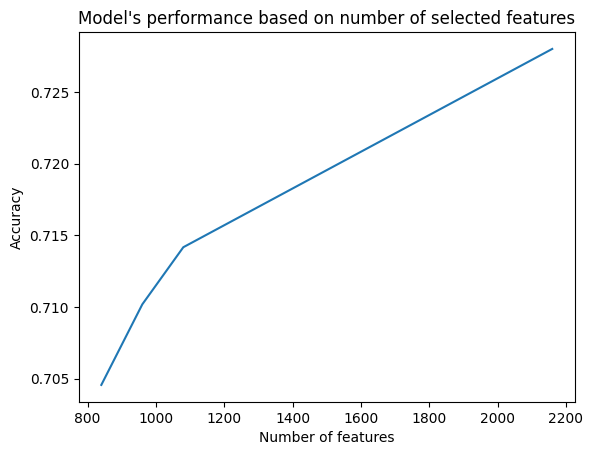

In [54]:
import matplotlib.pyplot as plt

plt.plot(K, performance)
plt.title("Model's performance based on number of selected features")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

### Attempt 2: Performing Dimensionality Reduction using PCA
* We’ll try to improve the model’s performance by implementing the Principal Component Analysis.

In [55]:
from sklearn.decomposition import PCA
import numpy as np

# Selecting a different number of components to construct a new dataset
N = [120, 240, 480, 960, 1920]
performance = []
for n in N: 
    # Fitting the model
    pca = PCA(n_components=n)
    X_k_kept = pca.fit_transform(X_train_enc)
    
    # Estimate accuracy on the dataset with n components
    classifier = SVC(gamma=0.005, random_state = 42)
    score_n_components = cross_val_score(classifier, X_k_kept, np.ravel(Y_train), scoring='f1_macro').mean()
    performance.append(score_n_components)
    print(f'Score with the dataset of top {n} components: {score_n_components:.2f}')    


Score with the dataset of top 120 components: 0.68
Score with the dataset of top 240 components: 0.72
Score with the dataset of top 480 components: 0.74
Score with the dataset of top 960 components: 0.76
Score with the dataset of top 1920 components: 0.76


Text(0, 0.5, 'Accuracy')

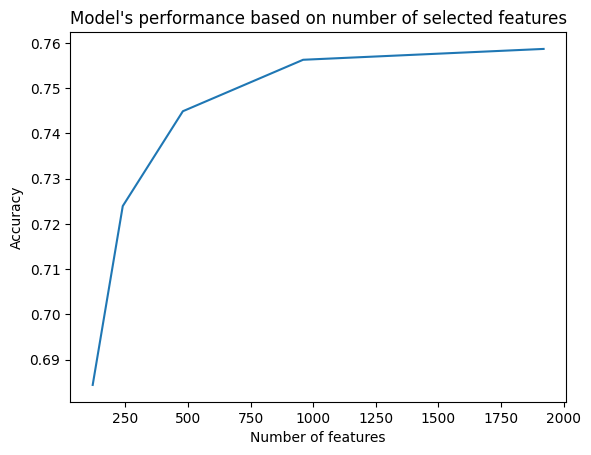

In [56]:
import matplotlib.pyplot as plt

plt.plot(N, performance)
plt.title("Model's performance based on number of selected features")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")

### Storing the complete pre-processed training dataset (We will use the full dataset to predict what Danone called the testing dataset). 
* We'll store the dataset now that we know how many PCA components to use. 
* We will then train a new model using SVC or Neural Networks and we'll predict the values for the testing dataset.

In [62]:
import numpy as np

# Stack the datasets vertically to get the full training dataset, encoded. 
X_full_enc = np.vstack((X_train_enc, X_test_enc))

# Same with the labels
Y_full = np.concatenate((Y_train, Y_test))


In [63]:
X_full_enc.shape, Y_full.shape

((20835, 23558), (20835, 1))

In [65]:
# Now that we know how many components to use, we'll create a new dataset using the full training set
# Fitting the model
pca = PCA(n_components=960)
X_training_pca = pca.fit_transform(X_full_enc)
X_eval_pca = pca.transform(X_eval_enc)

# Saving our datasets
np.save('X_full_enc.npy', X_training_pca)
np.save('Y_full.npy', Y_full)
np.save('X_eval_enc.npy', X_eval_pca)

